In [25]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
sns.set(rc = {'figure.figsize':(15,8)})
matplotlib.rc('font' , family=font_name)#한글폰트 설정

In [26]:
# 데이터 불러오기
df = pd.read_excel('자동차항만입출항전처리데이터.xlsx', index_col=0)
df

,선명,호출부호,입항년도,입항월,입항횟수,입출,총톤수,계선,계선장소,계선장소.1,작업시간,예선,도선,차항지,전출항지,선사번호
0,TITANIA,9HA2272,2011,12,1,0,74255,MBJ 02,MBJ,2,116.000000,1,1,korea,korea,EUKO
1,WESTERN HIGHWAY,3EJK5,2011,12,1,0,39422,MBJ 02,MBJ,2,107.583333,1,1,asia,e_asia,EVOL
2,NORTHERN HIGHWAY,V7FT4,2012,1,1,1,39422,MBJ 01,MBJ,1,38.000000,1,1,america,korea,GLVS
3,NORTHERN HIGHWAY,V7FT4,2012,1,1,0,39422,MBJ 03,MBJ,3,38.000000,1,1,america,korea,GLVS
4,CAR STAR,A8VI6,2012,1,1,0,43790,MBJ 03,MBJ,3,7.750000,1,1,e_asia,e_asia,ZIMU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11428,PRESTIGE ACE,H3NG,2021,8,2,1,55878,MBJ 01,MBJ,1,15.750000,1,1,korea,asia,GLVS
11429,PASSAMA,ZDNC6,2021,8,2,1,47053,MBJ 03,MBJ,3,73.000000,1,1,e_asia,korea,L53K
11430,아세안 메저스티호,DSMZ8,2021,8,2,1,71383,MBJ 02,MBJ,2,39.750000,1,1,korea,korea,EUKO
11431,MORNING LILY,3FDI5,2021,8,2,1,70853,MBJ 03,MBJ,3,15.750000,1,1,korea,korea,EUKO


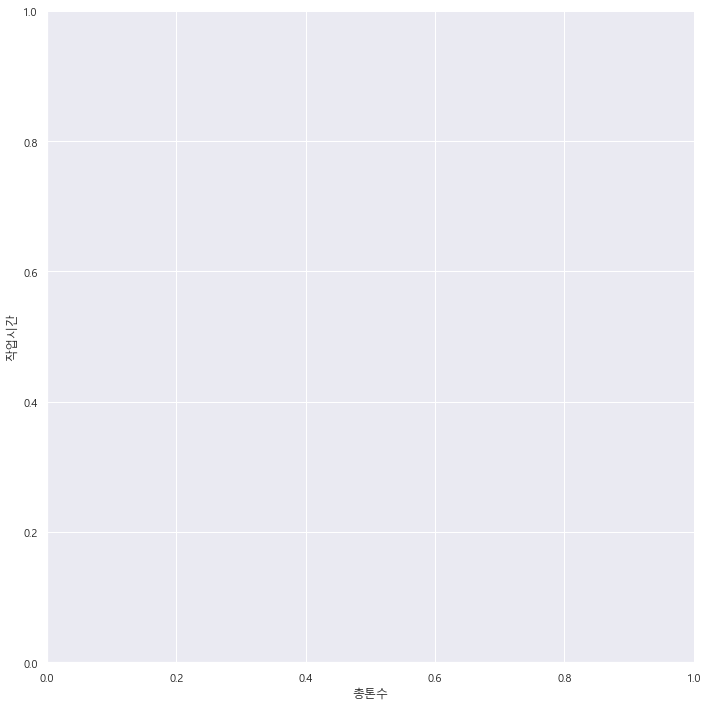

In [27]:
sns.pairplot(df, x_vars=['총톤수'], 
             y_vars='작업시간',size=10, aspect=1, kind='scatter')

In [5]:
# 'TV' Column을 변수 X로 지정
X = df['총톤수']

X.head()

0    74255
1    39422
2    39422
3    39422
4    43790
Name: 총톤수, dtype: int64

In [6]:
# 'Sales Column을 target y로 지정
y = df['작업시간']

y.head()

0    116.000000
1    107.583333
2     38.000000
3     38.000000
4      7.750000
Name: 작업시간, dtype: float64

In [7]:
# sklearn의 model_selection으로 train_test_split 불러오기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    random_state=100) # random_state 인자를 동일하게 하면 동일하게 분리

In [8]:
print(X_train.shape)
print(X_test.shape)

(8000,)
(3430,)


In [9]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print

(8000,)
(8000,)
(3430,)
(3430,)


<function print>

In [11]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [12]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# lr에 LinearRegression() 지정
lr = LinearRegression()

# lr.fit() Model Fit 하기
lr.fit(X_train, y_train)

LinearRegression()

# 5.

In [13]:
lr.intercept_

17.93960949555869

In [14]:
lr.coef_

array([0.00020736])

In [15]:
# Print 절편(intercept)과 coefficients(상관계수)
print(lr.intercept_)
print(lr.coef_)

17.93960949555869
[0.00020736]


# 6. Predictions

In [16]:
# 예측을 위한 predictions on the testing set
y_pred = lr.predict(X_test)

In [17]:
type(y_pred)

numpy.ndarray

In [18]:
y_pred

array([29.90271307, 27.02411979, 31.56264243, ..., 28.58430823,
       27.14812201, 30.42547159])

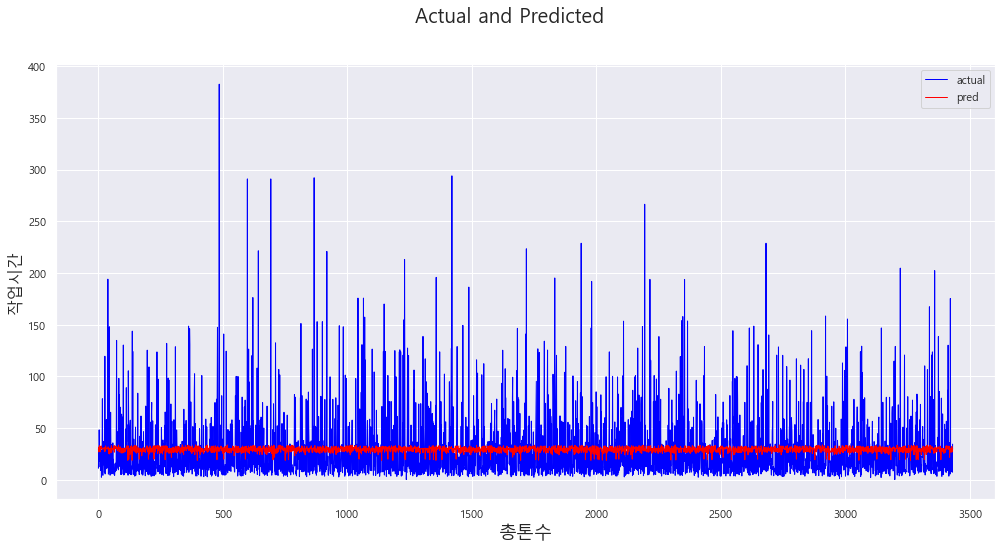

In [21]:
import matplotlib.pyplot as plt

c = [i for i in range(1, 3431, 1)]  # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=1, linestyle="-", label='actual')
plt.plot(c,y_pred, color="red",  linewidth=1, linestyle="-", label='pred')
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
plt.xlabel('총톤수', fontsize=18)  # X-label
plt.ylabel('작업시간', fontsize=16)   # Y-label
plt.legend()

plt.show()

Text(0, 0.5, '작업시간실제-예측')

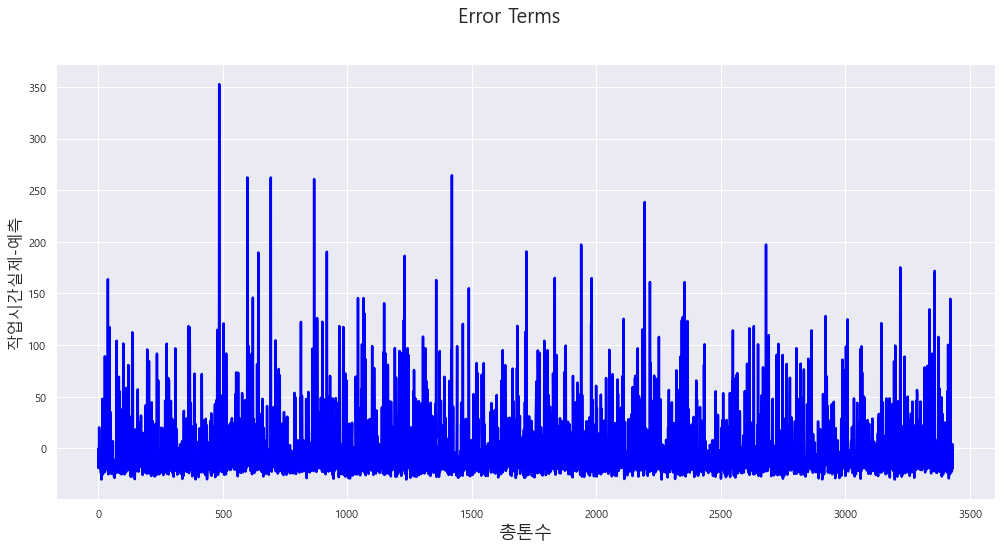

In [22]:
c = [i for i in range(1, 3431, 1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) # Plot heading 
plt.xlabel('총톤수', fontsize=18)              # X-label
plt.ylabel('작업시간실제-예측', fontsize=16)    # Y-label

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [24]:
print('Mean_Asolute_Error:', mae)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Asolute_Error: 21.87091927390313
Mean_Squared_Error : 1089.2523564968874
r_square_value : 0.0024207064473695805
